In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from argparse import Namespace

In [2]:
td_path = 'runtime/td'
td_logs = [os.path.join(td_path, i) for i in os.listdir(td_path) if '.out' in i] 

In [3]:
def read_td_log(fname):
    file = open(fname, 'r')
    args = eval(next(file))
    next(file)
    runtime, cl = args.runtime, []
    for line in file.readlines()[:-3]:
        line = line.strip('\n').split(',')
        it,tdnn_accuracy,tdsnn_accuracy,tdnn_loss,tdsnn_loss,conversion_loss = line
        cl.append(float(conversion_loss))
    return runtime, cl

In [4]:
data = {}
for log in td_logs:
    runtime, cl = read_td_log(log)
    if runtime not in data:
        data[runtime] = []
    data[runtime].append(np.mean(cl))

In [5]:
clean = []
for k, v in data.items():
    clean.append([k, v[0]])
clean.sort(key=lambda x : x[0])
clean = np.array(clean)

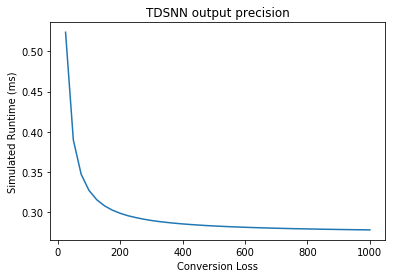

In [6]:
plt.plot(clean[:,0], clean[:,1])
plt.title('TDSNN output precision')
plt.xlabel('Conversion Loss')
plt.ylabel('Simulated Runtime (ms)')
plt.savefig('conversion-loss.png', dpi=200)
plt.savefig('conversion-loss.pdf', dpi=200)